In [7]:
import matplotlib.pyplot as plt
import japanize_matplotlib
import pandas as pd
import seaborn as sns
import numpy as np
import pickle

In [8]:
test_prompt_id = 1
data_path = f'outputs/DVRL_DomainAdaptation{test_prompt_id}_devsize30/'

## MLP

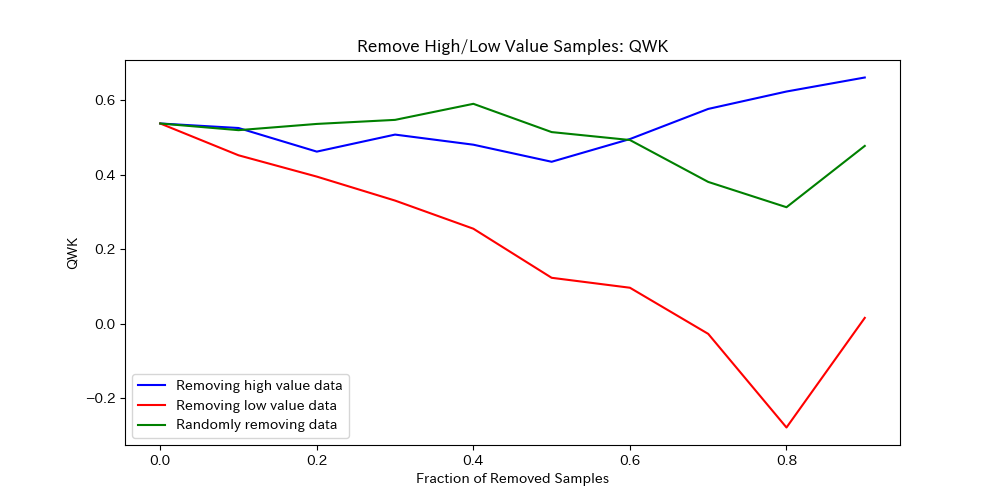

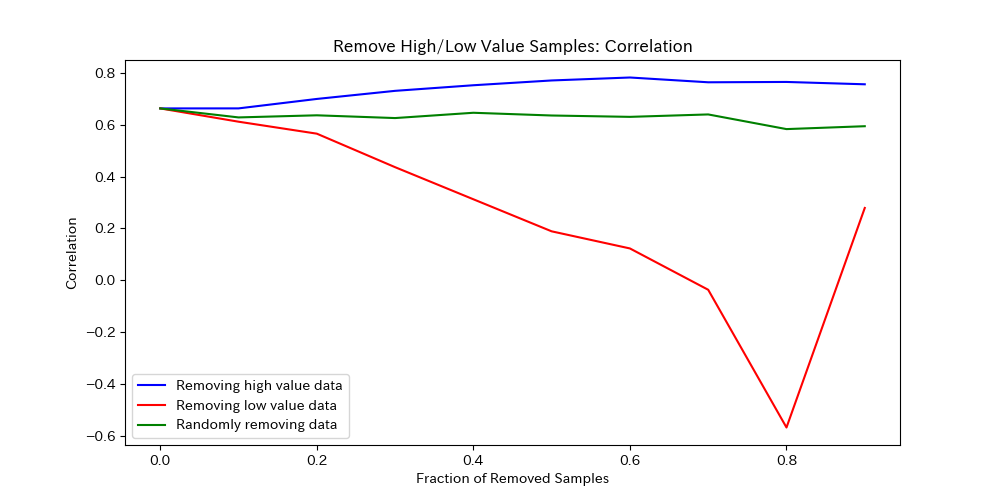

In [9]:
from IPython.display import Image, display

# Display the PNG image
image_path = data_path + 'remove_high_low_samples_qwk.png'
display(Image(filename=image_path))

image_path = data_path + 'remove_high_low_samples_corr.png'
display(Image(filename=image_path))

In [10]:
summary_df = pd.read_csv(data_path + 'metrics_summary.csv')
summary_df

,Metric,Value
0,QWK-high,0.622992
1,Correlation-high,0.764353
2,QWK-low,0.537123
3,Correlation-low,0.662420


## Only dev

In [11]:
only_dev_df = pd.read_csv(data_path + f'BERT-onlydev{test_prompt_id}.csv')
only_dev_df

,qwk,lwk,corr,rmse,mae
0,0.543208,0.31983,0.562142,0.127801,0.103191


## BERT

In [12]:
BERT_df = pd.read_csv(data_path + 'DVRL-BERT.csv')
BERT_df

,0.0,0.1,0.2,0.30000000000000004,0.4,0.5,0.6000000000000001,0.7000000000000001,0.8,0.9
0,0.530537,0.507720,0.513876,0.461112,0.502016,0.567588,0.540920,0.601358,0.639818,0.615355
1,0.767486,0.762940,0.731523,0.753041,0.782856,0.752134,0.757748,0.758900,0.782614,0.744495
2,0.016152,0.016758,0.011203,0.013726,0.012743,0.010654,0.010511,0.010147,0.008099,0.008984


In [13]:
min_index = BERT_df.iloc[2, :].values.argmin()
qwk = BERT_df.iloc[0, :].values[min_index]
corr = BERT_df.iloc[1, :].values[min_index]
print(f'QWK: {qwk}, Corr: {corr}')

QWK: 0.6398184182419344, Corr: 0.7826140279857284


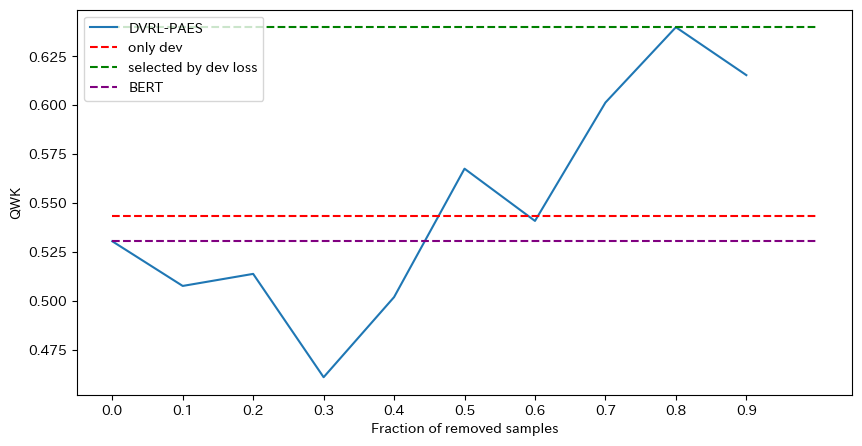

In [14]:
plt.figure(figsize=(10, 5))
plt.plot(np.arange(0, 1.0, 0.1), BERT_df.iloc[0, :], label='DVRL-PAES')
plt.hlines(only_dev_df.iloc[0, 0], 0, 1, label='only dev', linestyles='dashed', color='red')
plt.hlines(qwk, 0, 1, label='selected by dev loss', linestyles='dashed', color='green')
plt.hlines(BERT_df.iloc[0, :].values[0], 0, 1, label='BERT', linestyles='dashed', color='purple')
plt.xticks(np.arange(0, 1.0, 0.1))
plt.xlabel('Fraction of removed samples')
plt.ylabel('QWK')
plt.legend()
plt.show()

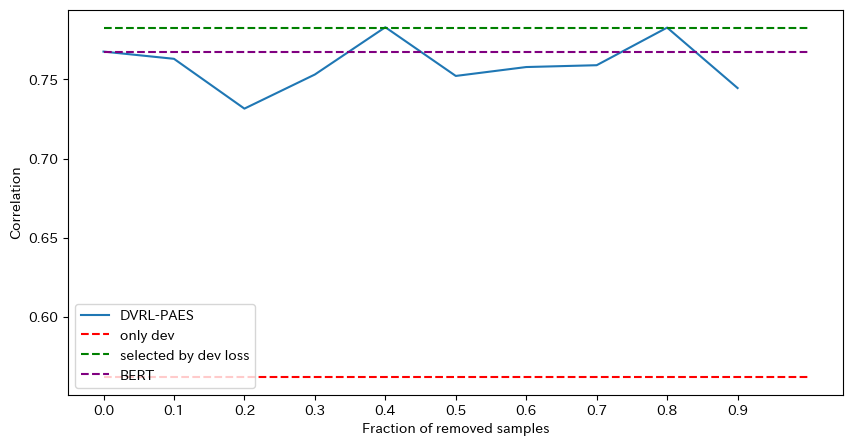

In [15]:
plt.figure(figsize=(10, 5))
plt.plot(np.arange(0, 1.0, 0.1), BERT_df.iloc[1, :], label='DVRL-PAES')
plt.hlines(only_dev_df.iloc[0, 2], 0, 1, label='only dev', linestyles='dashed', color='red')
plt.hlines(corr, 0, 1, label='selected by dev loss', linestyles='dashed', color='green')
plt.hlines(BERT_df.iloc[1, :].values[0], 0, 1, label='BERT', linestyles='dashed', color='purple')
plt.xticks(np.arange(0, 1.0, 0.1))
plt.xlabel('Fraction of removed samples')
plt.ylabel('Correlation')
plt.legend()
plt.show()

## PAES

In [16]:
PAES_df = pd.read_csv(data_path + 'DVRL-PAES.csv')
PAES_df

,0.0,0.1,0.2,0.30000000000000004,0.4,0.5,0.6000000000000001,0.7000000000000001,0.8,0.9
0,0.653084,0.687989,0.625890,0.655423,0.645335,0.651800,0.605541,0.640278,0.658672,0.619360
1,0.804383,0.829320,0.781541,0.766312,0.822665,0.822165,0.818332,0.774455,0.813812,0.779437
2,0.018312,0.013357,0.015505,0.012242,0.012325,0.009994,0.009718,0.007257,0.008715,0.006472


In [17]:
min_index = PAES_df.iloc[2, :].values.argmin()
qwk = PAES_df.iloc[0, :].values[min_index]
corr = PAES_df.iloc[1, :].values[min_index]
print(f'QWK: {qwk}, Corr: {corr}')

QWK: 0.6193602865229312, Corr: 0.7794370533075885


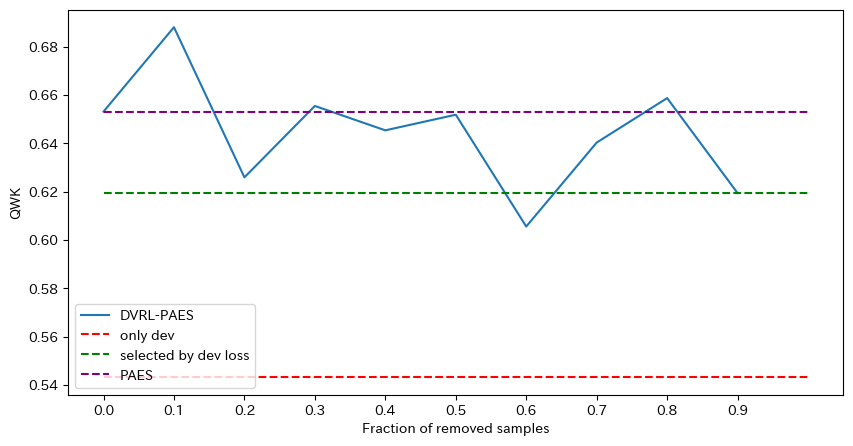

In [18]:
plt.figure(figsize=(10, 5))
plt.plot(np.arange(0, 1.0, 0.1), PAES_df.iloc[0, :], label='DVRL-PAES')
plt.hlines(only_dev_df.iloc[0, 0], 0, 1, label='only dev', linestyles='dashed', color='red')
plt.hlines(qwk, 0, 1, label='selected by dev loss', linestyles='dashed', color='green')
plt.hlines(PAES_df.iloc[0, :].values[0], 0, 1, label='PAES', linestyles='dashed', color='purple')
plt.xticks(np.arange(0, 1.0, 0.1))
plt.xlabel('Fraction of removed samples')
plt.ylabel('QWK')
plt.legend()
plt.show()

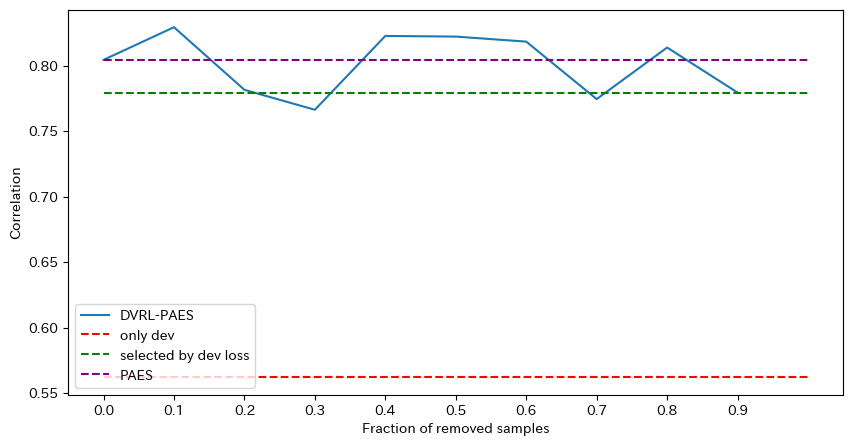

In [19]:
plt.figure(figsize=(10, 5))
plt.plot(np.arange(0, 1.0, 0.1), PAES_df.iloc[1, :], label='DVRL-PAES')
plt.hlines(only_dev_df.iloc[0, 2], 0, 1, label='only dev', linestyles='dashed', color='red')
plt.hlines(corr, 0, 1, label='selected by dev loss', linestyles='dashed', color='green')
plt.hlines(PAES_df.iloc[1, :].values[0], 0, 1, label='PAES', linestyles='dashed', color='purple')
plt.xticks(np.arange(0, 1.0, 0.1))
plt.xlabel('Fraction of removed samples')
plt.ylabel('Correlation')
plt.legend()
plt.show()